In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('C:/Users/srija/Documents/DS_Job_Salary_Predictor/data/clean_data.csv')

In [3]:
df.head()

,Rating,Size,Type_of_ownership,Industry,Sector,Revenue,Easy_Apply,Job_Title_simp,Job_Seniority,avg_salary,company_name,python_yn,R_yn,spark,aws,excel,job_state,job_headquarters,age_of_company,num_comp
0,3.4,1001 to 5000 employees,Company - Public,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),1,data_analyst,manager,109.5,Church & Dwight,1,0,0,0,1,NJ,NJ,177,0
1,3.4,10000+ employees,Government,Federal Agencies,Government,Unknown / Non-Applicable,1,data_analyst,na,20.0,"Veterans Affairs, Veterans Health Administration",0,0,0,0,0,LA,DC,93,0
2,3.2,10000+ employees,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),1,data_scientist,jr,139.0,Walmart,0,0,0,0,0,TX,AR,61,3
3,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),0,data_scientist,na,96.5,comScore,1,0,1,0,0,OR,VA,24,3
4,4.0,1001 to 5000 employees,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),1,data_analyst,na,21.5,Texas Health Huguley Hospital,0,0,0,1,0,TX,TX,46,0


In [4]:
df.describe()

,Rating,Easy_Apply,avg_salary,python_yn,R_yn,spark,aws,excel,age_of_company,num_comp
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,3.663085,0.528596,101.046794,0.533795,0.001733,0.220104,0.249567,0.516464,166.358752,1.051993
std,0.633475,0.499615,39.154469,0.499289,0.041631,0.414676,0.433138,0.500162,461.022096,1.380947
min,-1.000000,0.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,3.300000,0.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
50%,3.700000,1.000000,96.500000,1.000000,0.000000,0.000000,0.000000,1.000000,34.000000,0.000000
75%,4.000000,1.000000,122.500000,1.000000,0.000000,0.000000,0.000000,1.000000,84.000000,3.000000
max,5.000000,1.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,4.000000


<Axes: >

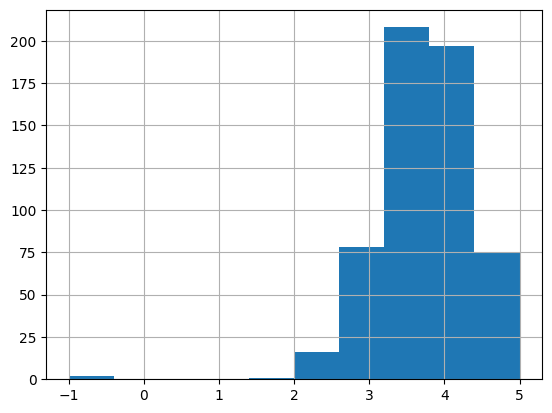

In [5]:
df.Rating.hist()

<Axes: >

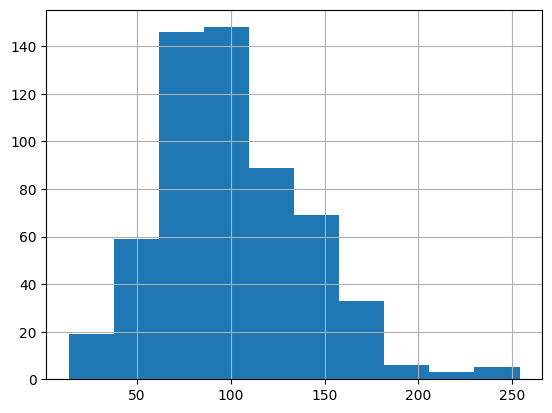

In [6]:
df.avg_salary.hist()

<Axes: >

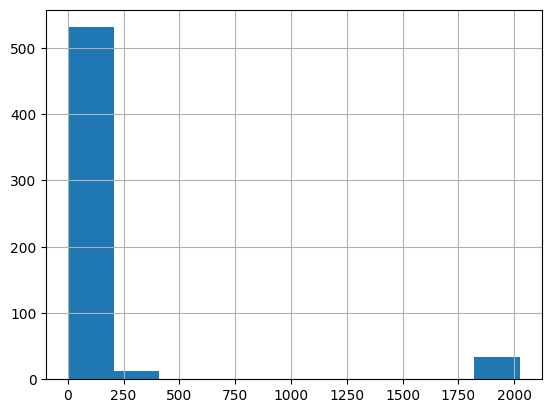

In [8]:
df.age_of_company.hist()

<Axes: >

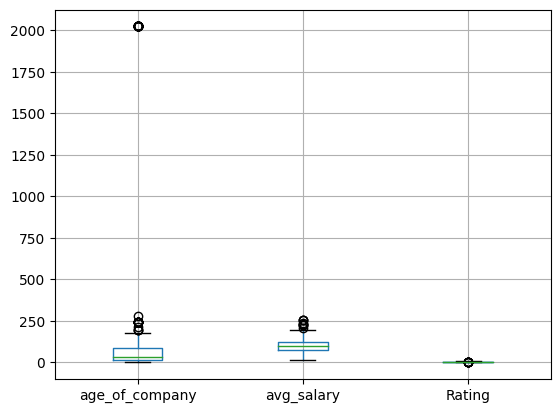

In [10]:
df.boxplot(column = ['age_of_company','avg_salary','Rating'])

<Axes: >

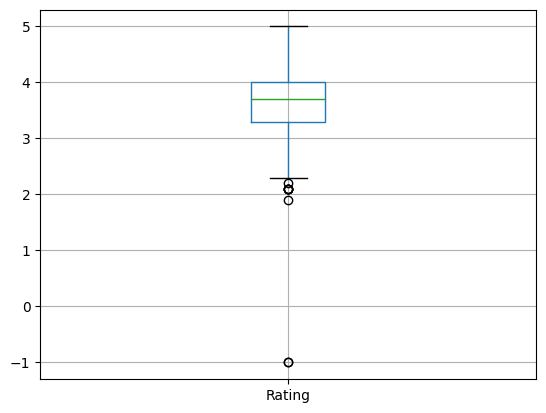

In [11]:
df.boxplot(column = 'Rating')

In [13]:
df[['age_of_company','avg_salary','Rating']].corr()

,age_of_company,avg_salary,Rating
age_of_company,1.000000,-0.011633,-0.101574
avg_salary,-0.011633,1.000000,0.036803
Rating,-0.101574,0.036803,1.000000


<Axes: >

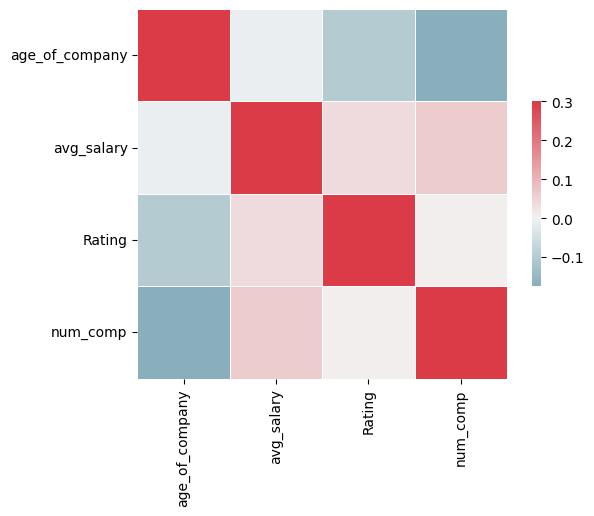

In [14]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age_of_company','avg_salary','Rating','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for job_state: total = 37


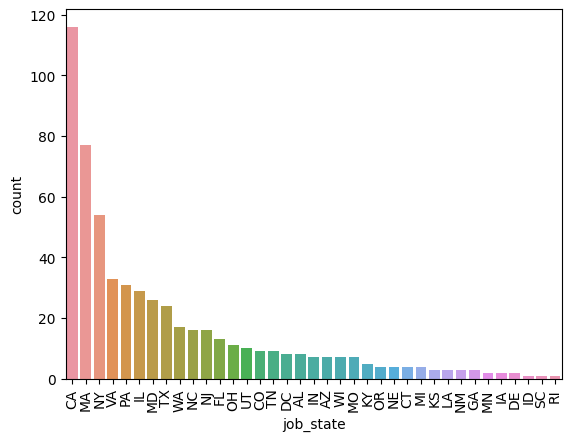

graph for job_headquarters: total = 45


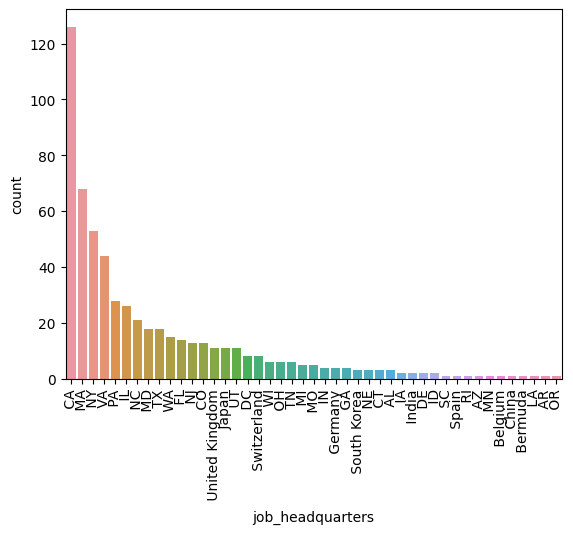

graph for Size: total = 8


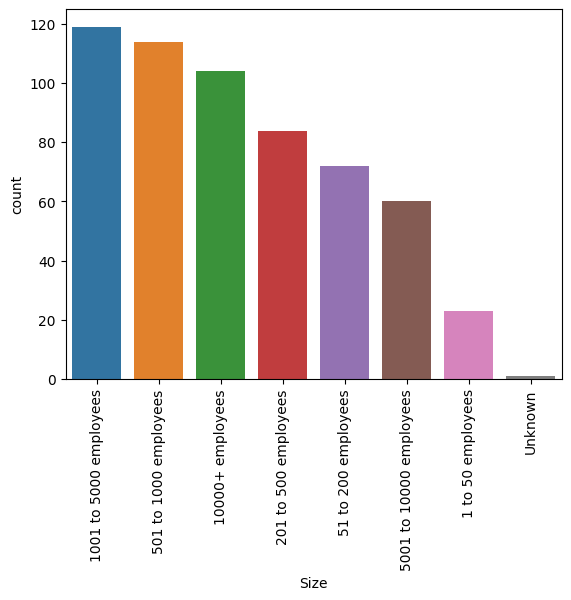

graph for Type_of_ownership: total = 10


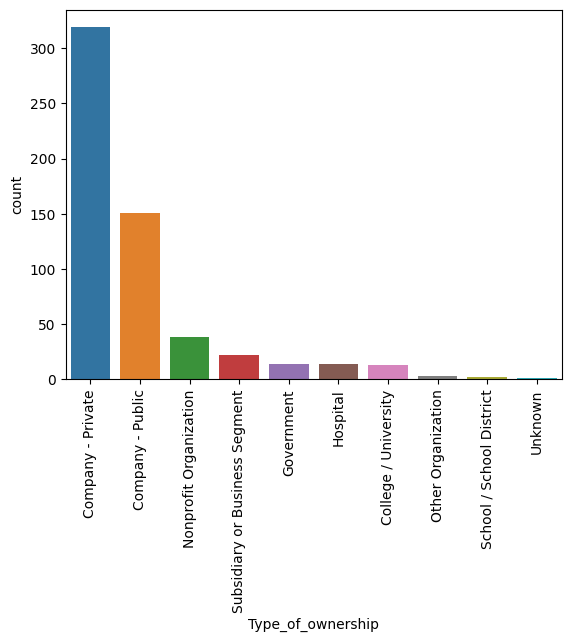

graph for Industry: total = 57


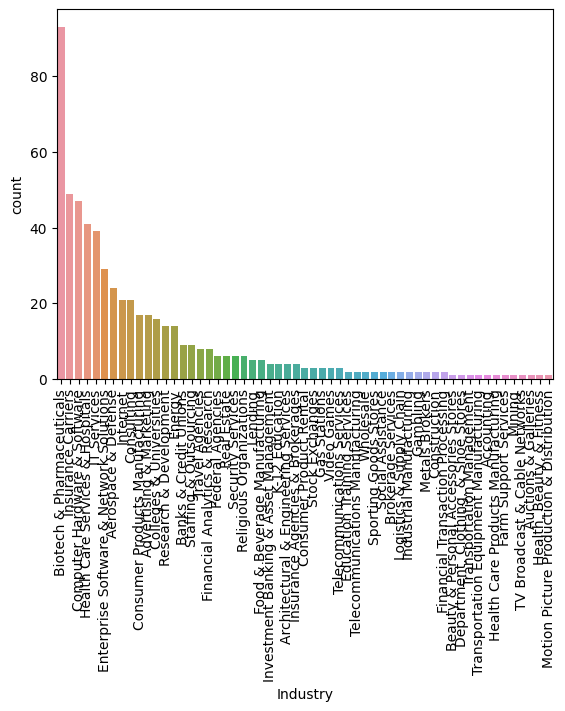

graph for Sector: total = 24


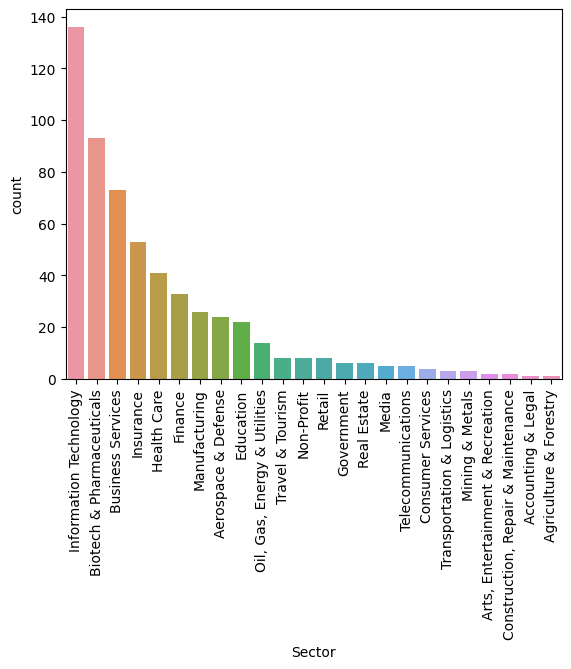

graph for Revenue: total = 13


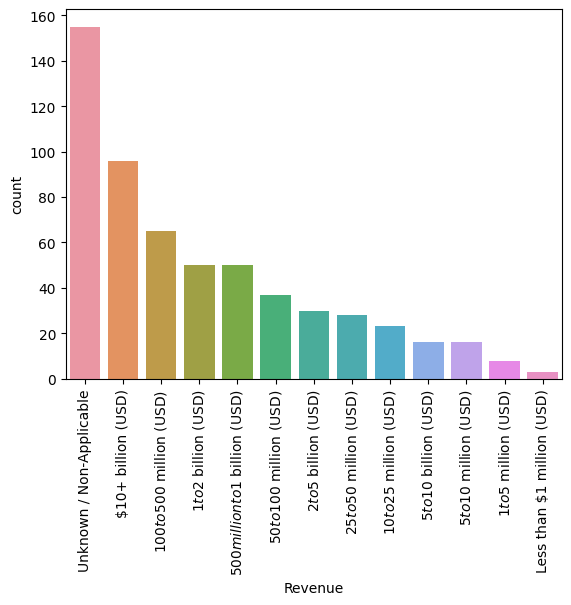

graph for python_yn: total = 2


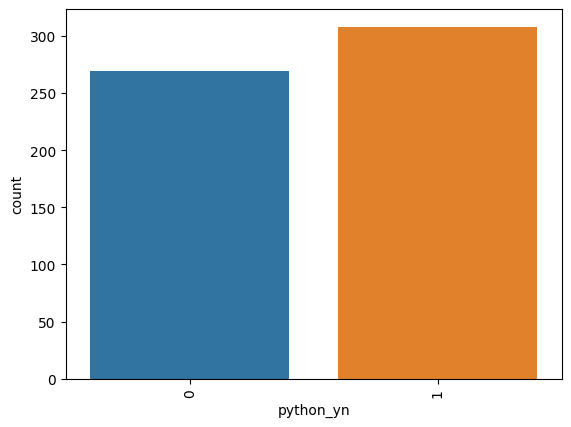

graph for R_yn: total = 2


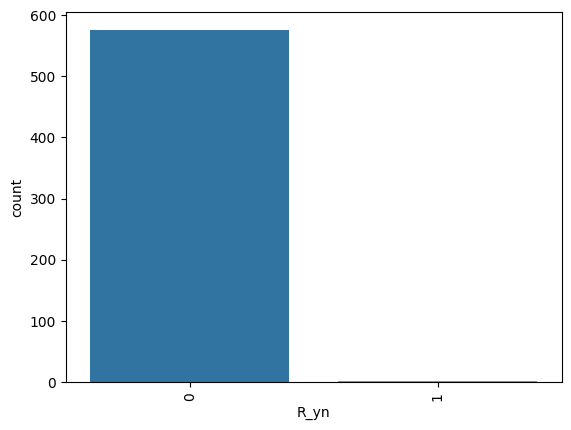

graph for spark: total = 2


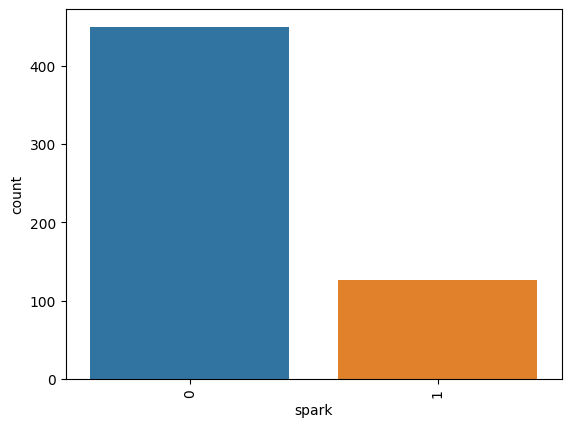

graph for aws: total = 2


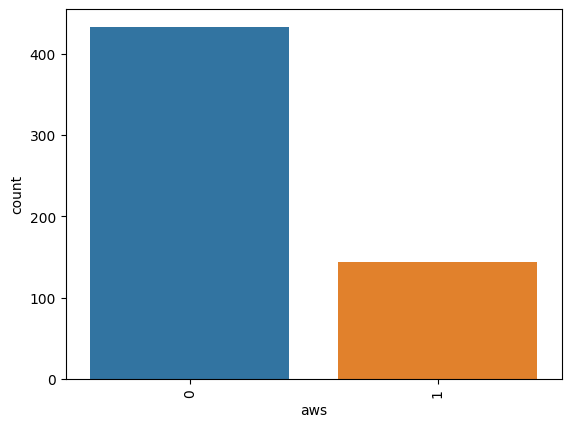

graph for excel: total = 2


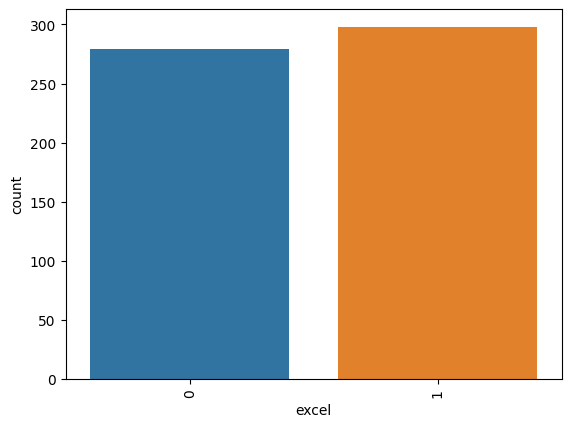

graph for Job_Title_simp: total = 3


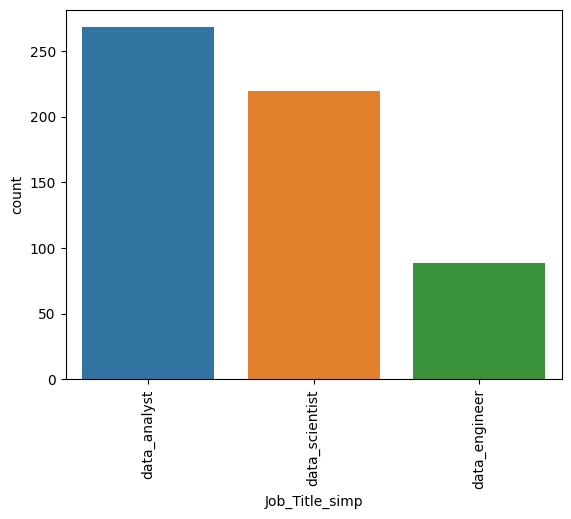

graph for Job_Seniority: total = 5


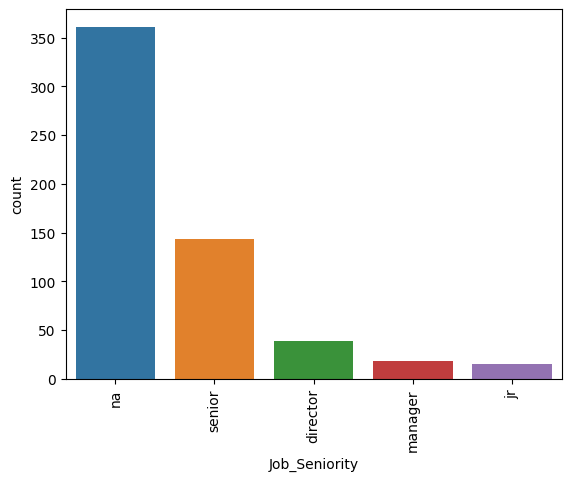

In [19]:
df_cat = df[['job_state', 'job_headquarters', 'Size','Type_of_ownership', 'Industry', 'Sector', 'Revenue','python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'Job_Title_simp', 'Job_Seniority']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for job_state: total = 20


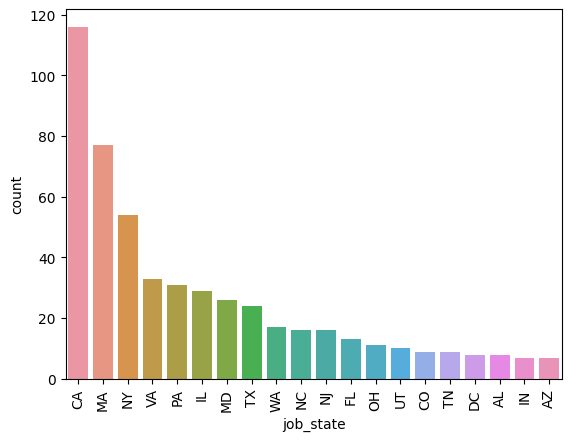

graph for job_headquarters: total = 20


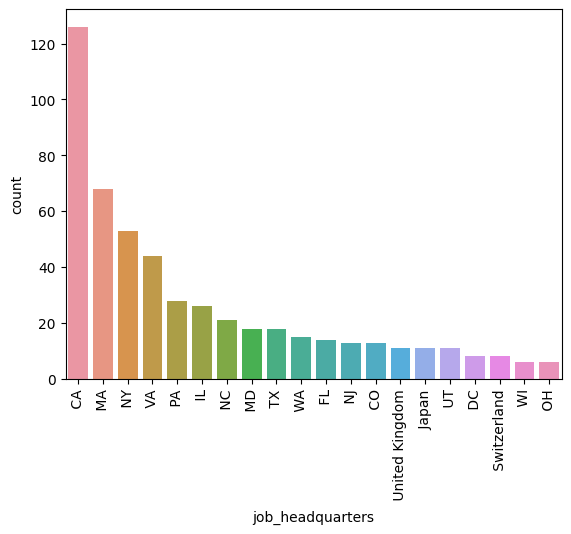

In [20]:
for i in df_cat[['job_state','job_headquarters']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [21]:
pd.pivot_table(df, index = 'Job_Title_simp', values = 'avg_salary')

,avg_salary
Job_Title_simp,
data_analyst,86.285448
data_engineer,103.893258
data_scientist,117.877273


In [23]:
pd.pivot_table(df, index = ['Job_Title_simp','Job_Seniority'], values = 'avg_salary')

avg_salary
Job_Title_simp Job_Seniority            
data_analyst   director       149.120000
               jr              89.111111
               manager         87.083333
               na              72.034161
               senior          98.718182
data_engineer  director       156.500000
               jr             147.500000
               na              89.938596
               senior         121.000000
data_scientist director       175.300000
               jr             155.250000
               na             105.489510
               senior         135.146154

In [26]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [27]:
pd.pivot_table(df, index = ['job_state','Job_Title_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state Job_Title_simp            
WI        data_scientist  110.250000
          data_analyst     56.900000
WA        data_scientist   94.468750
          data_analyst     97.500000
VA        data_scientist  111.214286
          data_engineer    93.875000
          data_analyst     77.454545
UT        data_analyst     54.750000
          data_engineer   100.333333
          data_scientist  140.500000
TX        data_scientist   97.700000
          data_engineer   113.062500
          data_analyst     36.250000
TN        data_scientist   96.000000
          data_engineer    99.428571
          data_analyst     13.500000
SC        data_analyst     60.500000
RI        data_analyst    100.000000
PA        data_analyst     89.360000
          data_engineer    91.500000
          data_scientist  110.300000
OR        data_scientist   98.500000
          data_engineer    73.000000
OH        data_scientist  106.166667
          data_analyst     63.300000
NY        data_scientist  116.232143
          data_engineer    79.833333
          data_analyst     73.500000
NM        data_scientist   74.333333
NJ        data_engineer   112.000000
          data_analyst    106.950000
          data_scientist  106.875000
NE        data_analyst     41.000000
NC        data_scientist  113.250000
          data_engineer   106.000000
          data_analyst     87.833333
MO        data_scientist  119.750000
          data_analyst     61.800000
MN        data_engineer    95.000000
          data_analyst     76.000000
MI        data_scientist   98.833333
          data_analyst     87.500000
MD        data_scientist  109.555556
          data_engineer   109.000000
          data_analyst     87.031250
MA        data_scientist  115.673077
          data_engineer   109.700000
          data_analyst    103.548780
LA        data_engineer    70.500000
          data_analyst     34.000000
KY        data_analyst    103.500000
          data_scientist   84.000000
KS        data_analyst     87.000000
IN        data_scientist   84.500000
          data_engineer   122.500000
          data_analyst     69.000000
IL        data_scientist  120.888889
          data_engineer    92.300000
          data_analyst    133.933333
ID        data_analyst     63.500000
IA        data_engineer    77.500000
          data_analyst     43.000000
GA        data_analyst     80.000000
          data_scientist   82.250000
FL        data_engineer    91.833333
          data_analyst     49.500000
          data_scientist  101.100000
DE        data_analyst     27.500000
DC        data_scientist  147.500000
          data_engineer    91.500000
          data_analyst     50.000000
CT        data_analyst     62.500000
          data_scientist   84.000000
CO        data_scientist  108.666667
          data_engineer    99.000000
          data_analyst     48.750000
CA        data_scientist  145.185185
          data_engineer   127.361111
          data_analyst     99.318182
AZ        data_scientist   69.500000
          data_analyst    124.500000
          data_engineer    74.375000
AL        data_engineer    65.000000
          data_analyst     56.928571

In [28]:
pd.pivot_table(df, index = ['job_state','Job_Title_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state Job_Title_simp            
WI        data_scientist           2
          data_analyst             5
WA        data_scientist          16
          data_analyst             1
VA        data_scientist          14
          data_engineer            8
          data_analyst            11
UT        data_analyst             4
          data_engineer            3
          data_scientist           3
TX        data_scientist          10
          data_engineer            8
          data_analyst             6
TN        data_scientist           1
          data_engineer            7
          data_analyst             1
SC        data_analyst             1
RI        data_analyst             1
PA        data_analyst            25
          data_engineer            1
          data_scientist           5
OR        data_scientist           3
          data_engineer            1
OH        data_scientist           6
          data_analyst             5
NY        data_scientist          28
          data_engineer            3
          data_analyst            23
NM        data_scientist           3
NJ        data_engineer            2
          data_analyst            10
          data_scientist           4
NE        data_analyst             4
NC        data_scientist           2
          data_engineer            5
          data_analyst             9
MO        data_scientist           2
          data_analyst             5
MN        data_engineer            1
          data_analyst             1
MI        data_scientist           3
          data_analyst             1
MD        data_scientist           9
          data_engineer            1
          data_analyst            16
MA        data_scientist          26
          data_engineer           10
          data_analyst            41
LA        data_engineer            1
          data_analyst             2
KY        data_analyst             4
          data_scientist           1
KS        data_analyst             3
IN        data_scientist           2
          data_engineer            1
          data_analyst             4
IL        data_scientist           9
          data_engineer            5
          data_analyst            15
ID        data_analyst             1
IA        data_engineer            1
          data_analyst             1
GA        data_analyst             1
          data_scientist           2
FL        data_engineer            3
          data_analyst             5
          data_scientist           5
DE        data_analyst             2
DC        data_scientist           4
          data_engineer            3
          data_analyst             1
CT        data_analyst             2
          data_scientist           2
CO        data_scientist           3
          data_engineer            2
          data_analyst             4
CA        data_scientist          54
          data_engineer           18
          data_analyst            44
AZ        data_scientist           1
          data_analyst             2
          data_engineer            4
AL        data_engineer            1
          data_analyst             7

In [31]:
pd.pivot_table(df[df.Job_Title_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

KeyError: 'avg_salary'

In [33]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type_of_ownership','avg_salary']]

for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    225.000000
 5.0    143.750000
 2.5    120.000000
 4.5    115.800000
 3.9    115.053191
 4.1    112.192308
 4.4    111.423077
 2.6    109.083333
 3.3    108.203125
 3.2    106.961538
 4.7    106.115385
 4.0    106.023256
 4.3    105.650000
 3.7    103.706522
 4.6    103.277778
 4.2     99.931818
 3.5     97.541667
 3.6     96.147059
 2.1     95.900000
 3.8     93.269231
 3.4     89.897059
 3.0     89.785714
 1.9     87.500000
 3.1     87.500000
 2.7     86.454545
 2.2     85.500000
 2.8     83.928571
 4.8     82.285714
 2.3     81.500000
 2.9     78.615385
 2.4     61.500000
Industry
                                          avg_salary
Industry                                            
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Department, Clothing, & Shoe Stores       139.000000
Brokerage Services                     

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [34]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),14.0,36.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),15.0,8.0
$10+ billion (USD),52.0,44.0
$100 to $500 million (USD),30.0,35.0
$2 to $5 billion (USD),12.0,18.0
$25 to $50 million (USD),18.0,10.0
$5 to $10 billion (USD),6.0,10.0
$5 to $10 million (USD),8.0,8.0


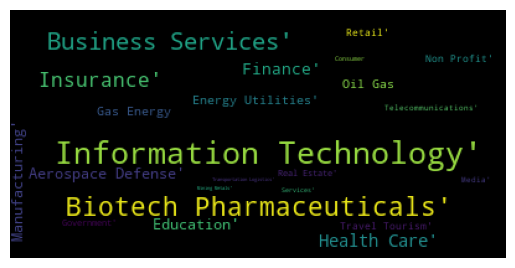

In [40]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = df['Sector'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()